### 問題1

1. Home Creditはどのような企業？

銀行口座を持たない人のために様々なデータを使って独自に顧客の返済能力を測り、より幅広く金融サービスを提供する企業。

2. このコンペティションでは何を予測する？

顧客の返済能力

3. それを予測することで企業が得られるメリットは何？

データのポテンシャルをさらに発揮させて、より多くの人に金融サービスを提供できるようになる。

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [2]:
### 問題2
df = pd.read_csv("data/application_train.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
# 課題2 欠損値
print("欠損値を含むカラム: {}".format(df.loc[:,df.isnull().sum() == 0].columns))
n_of_samples_having_null = (df.isnull().sum(axis=1)> 0).sum()
print(n_of_samples_having_null)
print("欠損値を含むサンプル数: {} ({}%)".format(n_of_samples_having_null, 100 *n_of_samples_having_null / len(df)))
pd.concat([df.isnull().sum(), df.isnull().sum() / len(df)], axis=1, keys=['Total', 'Percent']).sort_values(ascending=False, by='Total')

欠損値を含むカラム: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9

,Total,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


延滞したサンプルデータの割合: 8.07%


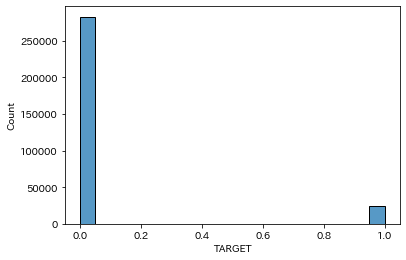

In [7]:
sns.histplot(df["TARGET"])
print("延滞したサンプルデータの割合: {:.2f}%".format(100 * (df["TARGET"] == 1).sum() / len(df)))

### 要素 (いくつかサンプルでpickup)
- TARGET: 延滞したかどうか、1がしてる、０がしてない
- NAME_CONTRACT_TYPE: ローンの種類、cash or revolving
- CODE_GENDER: 性別
- FLAG_OWN_CAR: 車持ってるか
- FLAG_OWN_REALTY: 家持ってるか
- CNT_CHILDREN: 子供の数
- AMT_INCOME_TOTAL: 収入額
- AMT_CREDIT: ローン額
- AMT_ANNUITY: 年金
- AMT_GOODS_PRICE: 担保
- NAME_TYPE_SUITE: 保証人種別
- NAME_INCOME_TYPE: 収入の方法
- NAME_EDUCATION_TYPE: 学歴
- NAME_FAMILY_STATUS: 家族構成
- NAME_HOUSING_TYPE: 住宅種別 (賃貸とか)
- REGION_POPULATION_RELATIVE: 住んでる地域の人口密度
- DAYS_BIRTH: 生まれてからの日数、契約時から何日前かなのでnegativeで表現されてる
- DAYS_EMPLOYED: 雇用期間
- DAYS_REGISTRATION: 登録を変更するまでの日数？？
- DAYS_ID_PUBLISH: personal ID提出前での日数
- OWN_CAR_AGE: 車の年数
- FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL: ooを持ってるか (1(yes) or 0)
- OCCUPATION_TYPE: 職種
- CNT_FAM_MEMBERS: 家族数
- REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY: 住まいの評価 (1,2,3)
- WEEKDAY_APPR_PROCESS_START: ローンを受けた日の曜日
- HOUR_APPR_PROCESS_START: ローンを受けた時の時間
- REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION: 住所の不一致
- ORGANIZATION_TYPE: 職場の種類
- EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3: 他のソースからのスコアリング
- FLAG_DOCUMENT_XX: XXのドキュメントを提出したか

### 問題2 考察
 - 要素数が122ととても多い
 - ほぼ全てのサンプルが何かしらの欠損値を含んでいる。
 - データは、数値だけでなく、割合は  float64(65), int64(41), object(16) より13%がカテゴリ系のもの。ただし数値系のデータの中には1ならyesなどのデータもあるため、バイナリデータもある。
 - 延滞してる人のデータが8%弱
 - EXT_SOURCE_1, FLAG_DOCUMENT_1など具体的な内容が曖昧なものもいくつか含まれてる

### 問題3 検証内容
1. 項目数が多いので、なんのデータが目的変数(TARGET)と相関が高いかを調べる必要がある。
2. 相関値が一番いいもの(正の相関のうち)でもDAYS_BIRTHが0.078239でかなり小さい. targetがバイナリなのが原因か？まずはDAYS_BIRTHのデータを分析する。結果、 DAYS_BIRTHより若い世代ほど滞納する人が多いことがわかった。
3. 次は滞納者(targetが1)の人の傾向を分析する。まずは性別に着目して分析する。結果、女性より男性の方が滞納する確率が高い
4. 滞納者の生活の状態からも傾向を分析したい。家族構成, 子供の数、職種,収入の方法に関しても分析する。結婚していて（独身に比べてお金のかかるイベントが多かったり、自分以外を養うため）、単純労働者か、職がない状態のかたが滞納しやすい。
5. 保有物（車、持ち家）の有無が関連あるのか調べる。

In [8]:
### 問題4 1を分析
corrs = df.corr()

<AxesSubplot:>

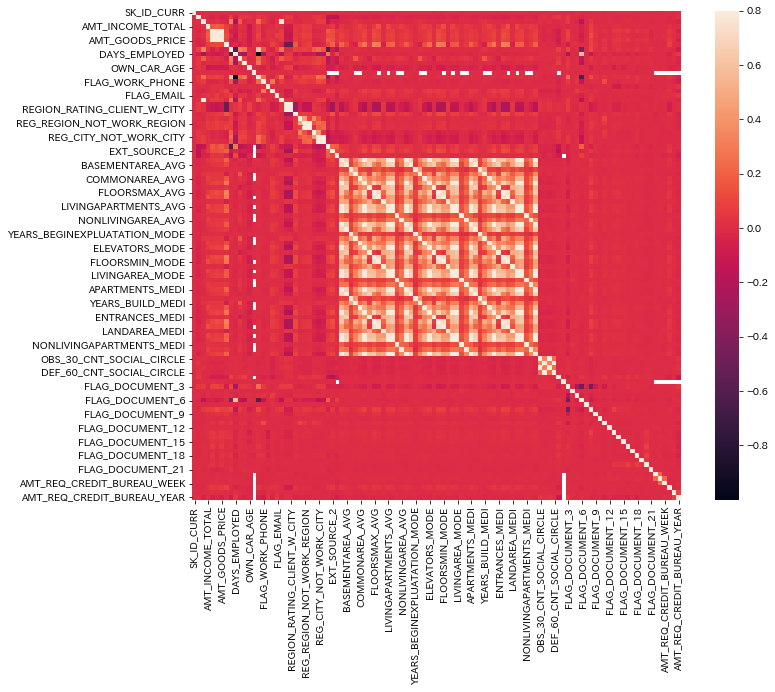

In [9]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrs, vmax=.8, square=True)

In [10]:
# 相関の高いtop10 
k = 10 #number of variables for heatmap
top_cols = corrs.nlargest(k, 'TARGET')['TARGET']
print(top_cols)
top_cols_ver_abs = corrs.abs().nlargest(k, 'TARGET')['TARGET']
print(top_cols_ver_abs)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64
TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64


<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Count'>

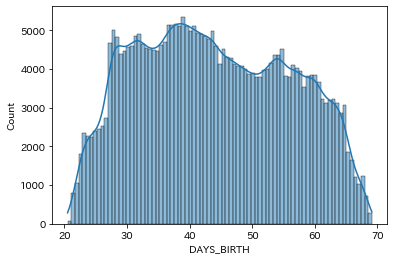

In [11]:
# 問題4 2 DAYS_BIRTHをデータ分析
sns.histplot(df["DAYS_BIRTH"] / 365 * (-1), kde=True)

利用者は20 - 70才弱までの方がおり、40才弱の方が分布上一番多い。

<AxesSubplot:xlabel='age_group', ylabel='Count'>

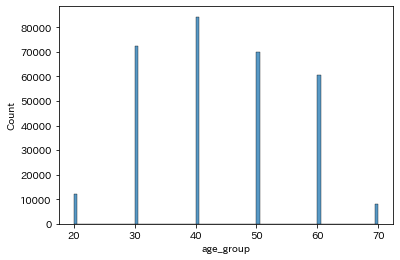

In [12]:
## 年代別にしてみる
df["age_group"] = round(df["DAYS_BIRTH"] / 365 * (-1), -1)
sns.histplot(df["age_group"])

<AxesSubplot:xlabel='age_group', ylabel='Count'>

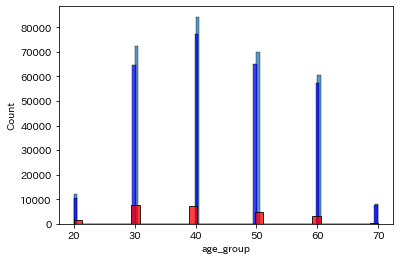

In [13]:
# 各年代の滞納者、期日までに返済した方の数を比較
sns.histplot(df["age_group"])
sns.histplot(df[df["TARGET"] == 0]["age_group"], color="b")
sns.histplot(df[df["TARGET"] == 1]["age_group"], color="r")

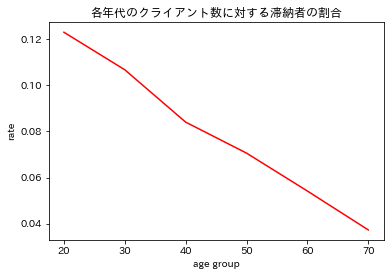

In [14]:
# 各年代のクライアント数に対する滞納者の割合
payment_difficulties_rate_per_age_group = df[df["TARGET"] == 1]["age_group"].value_counts() / df["age_group"].value_counts()
plt.title("各年代のクライアント数に対する滞納者の割合")
plt.plot(payment_difficulties_rate_per_age_group.index, payment_difficulties_rate_per_age_group, c='r')
plt.xlabel('age group')
plt.ylabel('rate')
plt.show()

若い世代ほど滞納する割合が高い

In [15]:
def display_payment_difficulty_rate_graph_per_values(feature, label_rotation=False):
    histplot = sns.displot(df[feature])
    if(label_rotation):
        histplot.set_xticklabels(rotation=90)
    plt.show()
    plt.title("{}のクライアント数に対する滞納者の割合".format(feature))
    rate_values = ((df[df["TARGET"] == 1][feature].value_counts() / df[feature].value_counts()).dropna()).sort_values(ascending=False)
#     sns.barplot(x=rate_values.index, y=rate_values)
    barplot = sns.barplot(x=rate_values.index, y=rate_values)
    if(label_rotation):
        barplot.set_xticklabels(barplot.get_xticklabels(),rotation=90)
    plt.xlabel(feature)
    plt.ylabel('rate')
    plt.show()

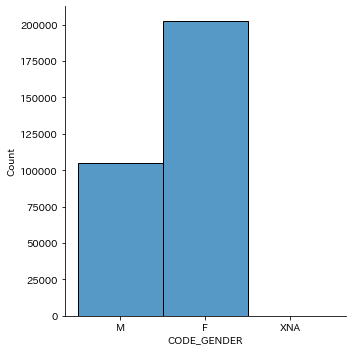

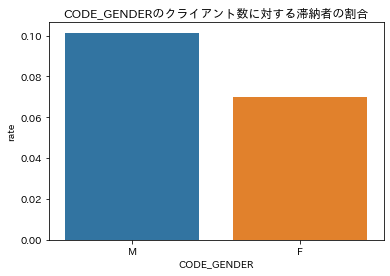

In [16]:
# 問題4 3 滞納者(TARGET=1)の中での性別に対してデータ分析を行う。
# 性別
display_payment_difficulty_rate_graph_per_values("CODE_GENDER")

男性の方が滞納する割合が多い

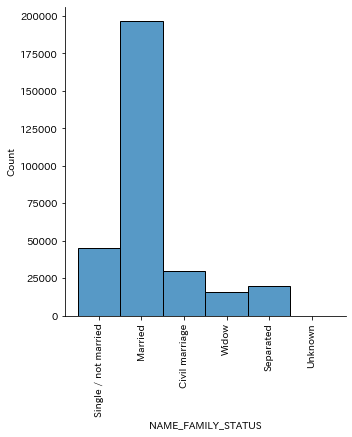

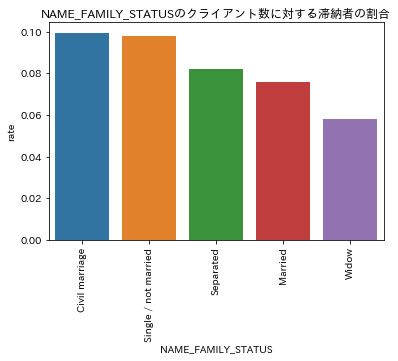

In [17]:
# 問題4 4 滞納者(TARGET=1)の中での家族構成, 職種,収入の方法に関しても分析する。
# 家族構成
display_payment_difficulty_rate_graph_per_values("NAME_FAMILY_STATUS", True)

民事婚, 独身の方が滞納しやすい。ただ、civil marriage, marriedで差が出るのか分からない。どちらの方式を取るかとその方の経済状況にどう関連があるかは別途調べる必要がある。

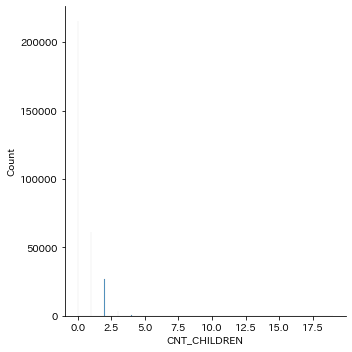

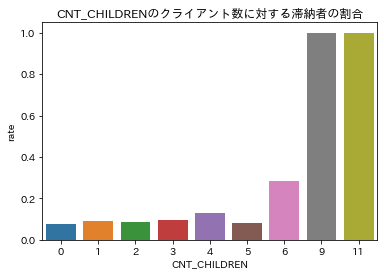

In [18]:
# 子供の数
display_payment_difficulty_rate_graph_per_values("CNT_CHILDREN")

母数が違うので極端なデータになりやすいが、総じて子供が多い方が滞納しやすい。

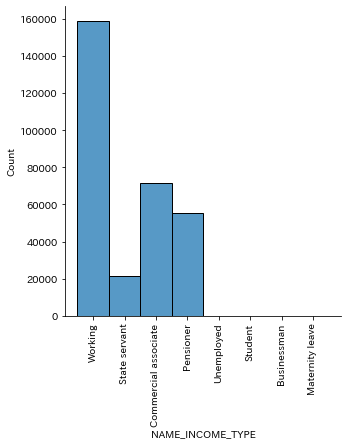

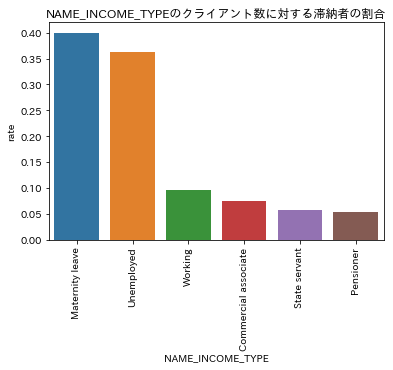

In [19]:
# 収入の方法
display_payment_difficulty_rate_graph_per_values("NAME_INCOME_TYPE", True)

育児休暇中、職がない状態の方が滞納するケースが多い。

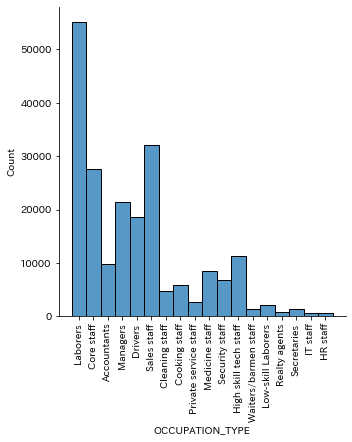

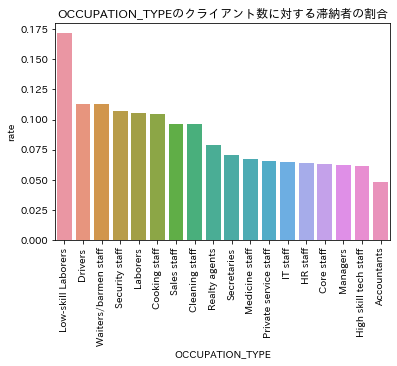

In [20]:
# 収入の方法
display_payment_difficulty_rate_graph_per_values("OCCUPATION_TYPE", True)

単純労働の方が多い。

#### 問題4 4 結論
結婚していて（独身に比べてお金のかかるイベントが多かったり、自分以外を養うため）、単純労働者か、職がない状態のかたが滞納しやすい。

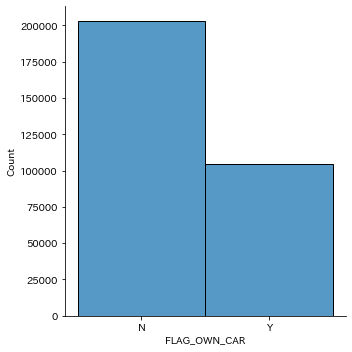

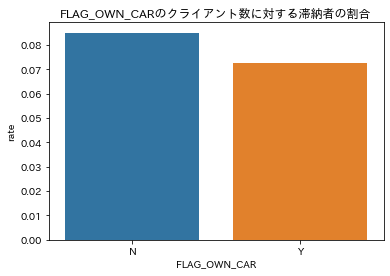

In [21]:
# 問題3 5
# 車の有無
display_payment_difficulty_rate_graph_per_values("FLAG_OWN_CAR")

車を持ってない方が滞納率が高い。車を持っている方の方が収入が多いからか？

In [22]:
np.corrcoef(df["FLAG_OWN_CAR"].replace({"Y": 1, "N": 0}), df["AMT_INCOME_TOTAL"])

array([[1.      , 0.083383],
       [0.083383, 1.      ]])

相関が正なので収入が多い方は車を持ってると思われる。ただし相関値は小さい、binaryデータが対象だとだと低く出やすいのか

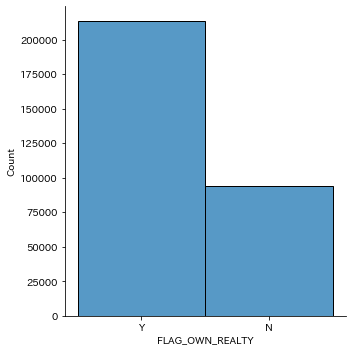

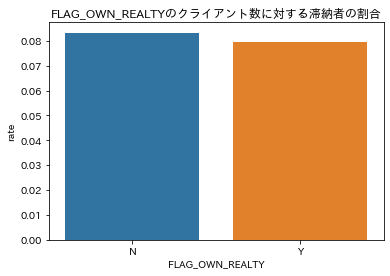

In [23]:
# 持ち家の有無
display_payment_difficulty_rate_graph_per_values("FLAG_OWN_REALTY")

持ち家の有無は、やや持ってない方の方が滞納者が多いが、車ほど差はない。

### 問題4 検証結果まとめ
1. 項目数が多いので、なんのデータが目的変数(TARGET)と相関が高いかを調べる必要がある。
 -> DAYS_BIRTHが最もいいが、相関値は小さい。
2. DAYS_BIRTHのデータを分析する
 ->  DAYS_BIRTHより若い世代ほど滞納する人が多いことがわかった。
3. 次は滞納者(targetが1)の人の傾向を分析する。まずは性別に着目して分析する。
 -> 女性より男性の方が滞納する確率が高い
4. 滞納者の生活の状態からも傾向を分析したい。
 -> 家族構成, 子供の数、職種,収入の方法に関しても分析する。結婚していて（独身に比べてお金のかかるイベントが多かったり、自分以外を養うため）、単純労働者か、職がない状態のかたが滞納しやすい。
5. 保有物（車、持ち家）の有無が関連あるのか調べる。
 -> どちらも持ってない方の方が滞納しやすい。